In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 加載MNIST數據集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 擴展數據的維度以適應VGG16的輸入格式
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 將灰度圖像轉換為RGB圖像
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# 調整圖像大小到32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# 歸一化
x_train, x_test = x_train / 255.0, x_test / 255.0


11501568/11490434 [==============================] - 1s 0us/step


In [3]:
# 使用預訓練的VGG16模型，不包含頂部的全連接層
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 凍結預訓練模型的卷積層
for layer in base_model.layers:
    layer.trainable = False


58900480/58889256 [==============================] - 3s 0us/step


In [4]:
# 構建模型
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# 訓練模型
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 50s 11ms/step - loss: 0.3259 - accuracy: 0.9045 - val_loss: 0.1475 - val_accuracy: 0.9554
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1445 - accuracy: 0.9543 - val_loss: 0.1142 - val_accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1187 - accuracy: 0.9619 - val_loss: 0.0978 - val_accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1031 - accuracy: 0.9665 - val_loss: 0.1108 - val_accuracy: 0.9632
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0941 - accuracy: 0.9693 - val_loss: 0.0869 - val_accuracy: 0.9722


In [6]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 3s - loss: 0.0869 - accuracy: 0.9722 - 3s/epoch - 9ms/step

Test accuracy: 0.9721999764442444


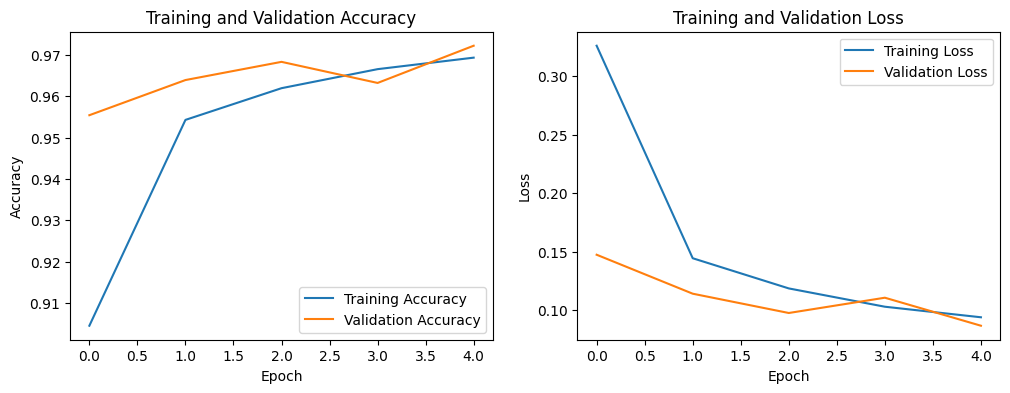

In [7]:
# 繪製訓練和驗證的損失和準確率曲線
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.show()


In [8]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import GlobalAveragePooling2D
# 載入 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# 正規化數據
x_train, x_test = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 442s 3us/step


In [9]:
# VGG16 預訓練模型
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 凍結 VGG16 的卷積層
vgg16_base.trainable = False

# 建立模型
model_vgg16 = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),  # 進行全局平均池化，將每個特徵圖的所有值壓縮為一個數值
    Dense(10, activation='softmax')  # 輸出層，10 個類別
])

# 編譯模型
model_vgg16.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [10]:
# 訓練 VGG16 模型
history_vgg16 = model_vgg16.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5312 - accuracy: 0.4790 - val_loss: 1.3723 - val_accuracy: 0.5305
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3102 - accuracy: 0.5520 - val_loss: 1.2974 - val_accuracy: 0.5528
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2522 - accuracy: 0.5710 - val_loss: 1.2632 - val_accuracy: 0.5606
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2177 - accuracy: 0.5810 - val_loss: 1.2402 - val_accuracy: 0.5668
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1962 - accuracy: 0.5881 - val_loss: 1.2326 - val_accuracy: 0.5736
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1814 - accuracy: 0.5948 - val_loss: 1.2191 - val_accuracy: 0.5739
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1696 - accuracy: 0.5974 - val_loss: 1.2143 -

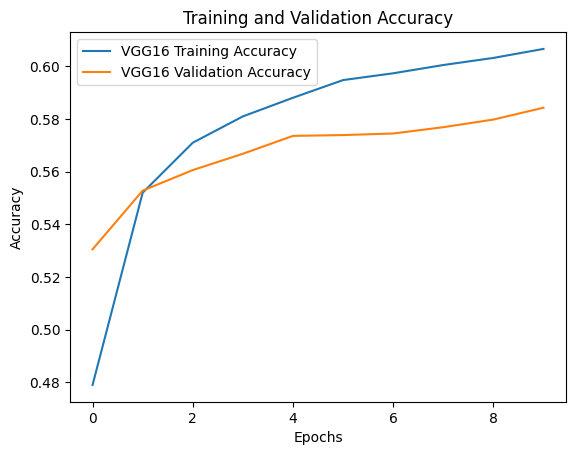

In [11]:
import matplotlib.pyplot as plt

# 顯示訓練和驗證的準確度
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/5
1563/1563 [==============================] - 55s 34ms/step - loss: 0.8168 - accuracy: 0.7181 - val_loss: 0.6008 - val_accuracy: 0.7948
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4841 - accuracy: 0.8356 - val_loss: 0.5203 - val_accuracy: 0.8206
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.3515 - accuracy: 0.8816 - val_loss: 0.4993 - val_accuracy: 0.8354
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.2445 - accuracy: 0.9158 - val_loss: 0.4698 - val_accuracy: 0.8474
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.1723 - accuracy: 0.9409 - val_loss: 0.5308 - val_accuracy: 0.8442


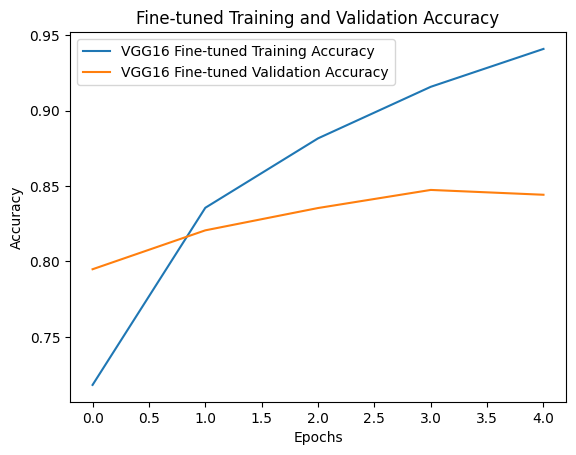

In [12]:
# 解除 VGG16部分層的凍結
vgg16_base.trainable = True

# 重新編譯模型
model_vgg16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 重新訓練
history_vgg16_fine_tune = model_vgg16.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 顯示微調後的結果
plt.plot(history_vgg16_fine_tune.history['accuracy'], label='VGG16 Fine-tuned Training Accuracy')
plt.plot(history_vgg16_fine_tune.history['val_accuracy'], label='VGG16 Fine-tuned Validation Accuracy')
plt.title('Fine-tuned Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()